In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv('heart.csv')
df = pd.get_dummies(data)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='Age', ylabel='Count'>

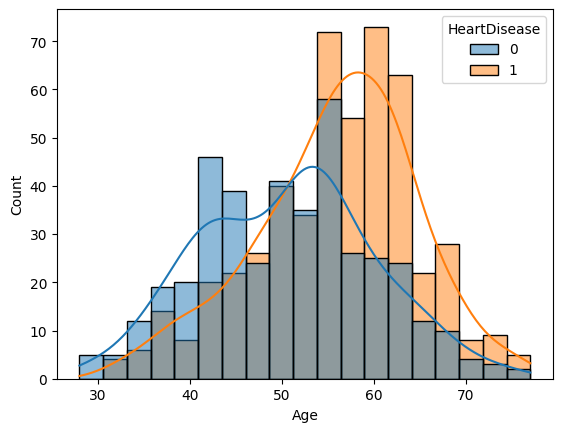

In [ ]:
sns.histplot(data= data, x = 'Age', kde=True, hue= 'HeartDisease'  )

<Axes: xlabel='Cholesterol', ylabel='Count'>

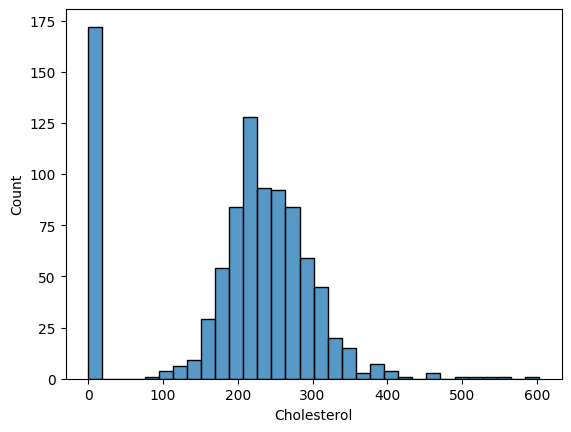

In [ ]:
sns.histplot(data['Cholesterol'])

<Axes: >

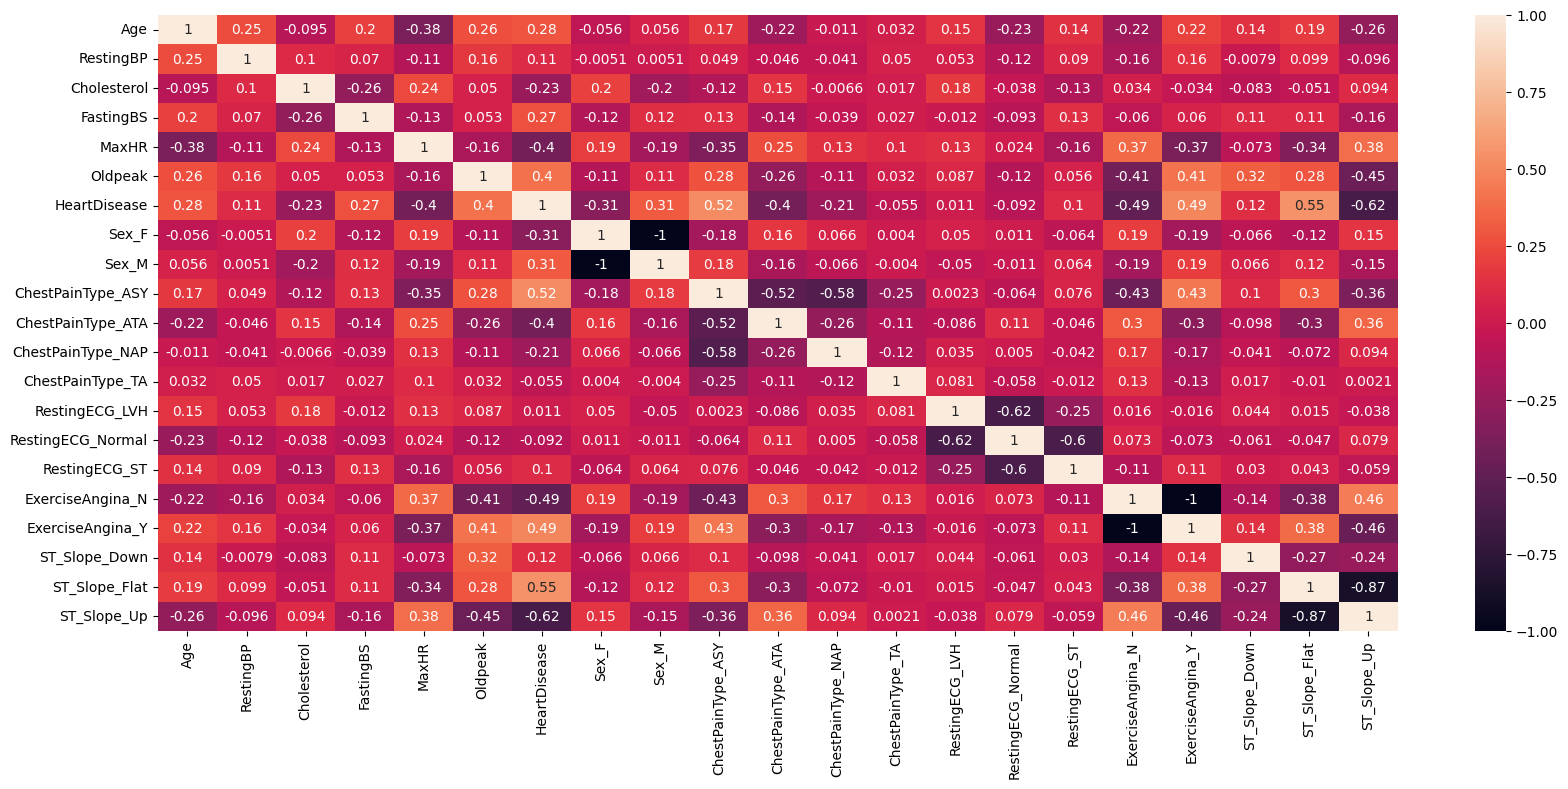

In [ ]:
cr = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(cr, annot= True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'RestingBP'),
  Text(2, 0, 'Cholesterol'),
  Text(3, 0, 'FastingBS'),
  Text(4, 0, 'MaxHR'),
  Text(5, 0, 'Oldpeak'),
  Text(6, 0, 'HeartDisease'),
  Text(7, 0, 'Sex_F'),
  Text(8, 0, 'Sex_M'),
  Text(9, 0, 'ChestPainType_ASY'),
  Text(10, 0, 'ChestPainType_ATA'),
  Text(11, 0, 'ChestPainType_NAP'),
  Text(12, 0, 'ChestPainType_TA'),
  Text(13, 0, 'RestingECG_LVH'),
  Text(14, 0, 'RestingECG_Normal'),
  Text(15, 0, 'RestingECG_ST'),
  Text(16, 0, 'ExerciseAngina_N'),
  Text(17, 0, 'ExerciseAngina_Y'),
  Text(18, 0, 'ST_Slope_Down'),
  Text(19, 0, 'ST_Slope_Flat'),
  Text(20, 0, 'ST_Slope_Up')])

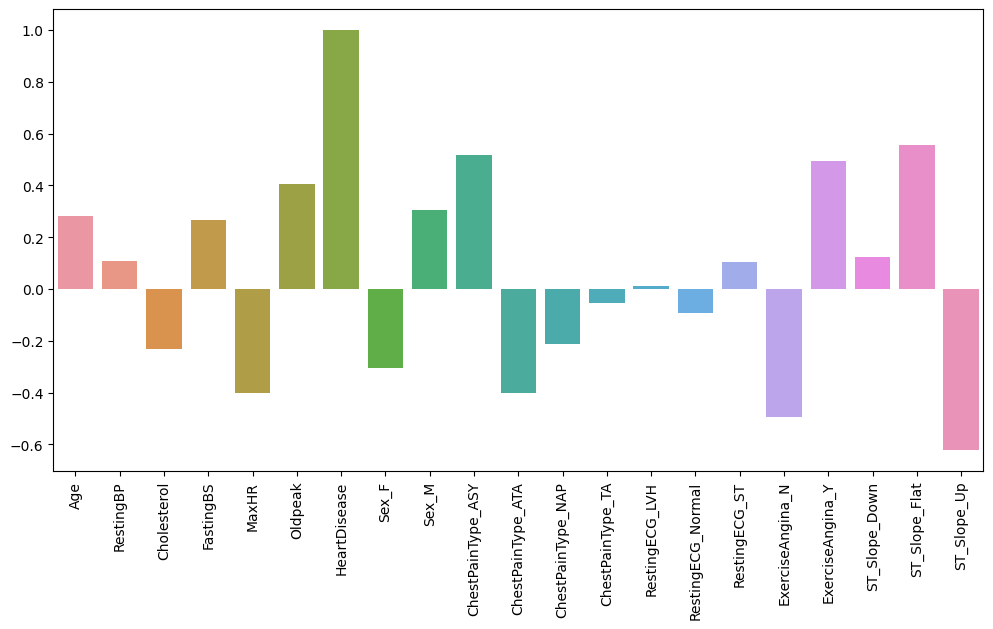

In [ ]:
corr_v = cr['HeartDisease']
col = cr.columns
plt.figure(figsize=(12,6))
sns.barplot(y = corr_v.values, x =col)
plt.xticks(rotation='vertical')

These have almost no correlation to the disese so we might drop them later


In [ ]:
idx = np.where(abs(corr_v.values)<0.2)

drop_col_names = col[idx]
print(drop_col_names)

Index(['RestingBP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Down'],
      dtype='object')


In [ ]:
#Let's find out heighest column
idx = np.where(abs(corr_v.values)>0.5)

drop_col_names = col[idx]
print(drop_col_names)

Index(['HeartDisease', 'ChestPainType_ASY', 'ST_Slope_Flat', 'ST_Slope_Up'], dtype='object')


In [ ]:
print(data['HeartDisease'].value_counts())

1    508
0    410
Name: HeartDisease, dtype: int64


<Axes: xlabel='ExerciseAngina_Y', ylabel='Oldpeak'>

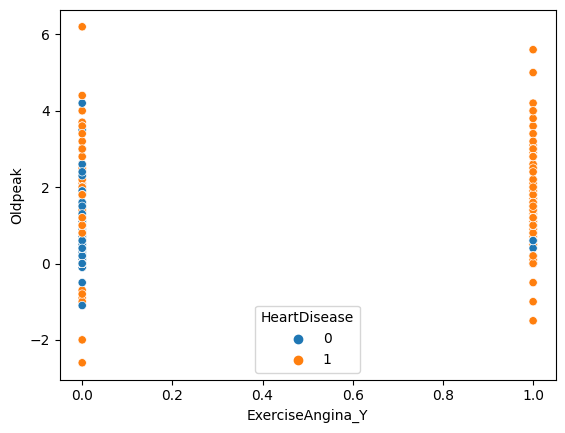

In [ ]:
sns.scatterplot(y= 'Oldpeak', x='ExerciseAngina_Y', data= df, hue= 'HeartDisease' )

<Axes: xlabel='ExerciseAngina_Y', ylabel='count'>

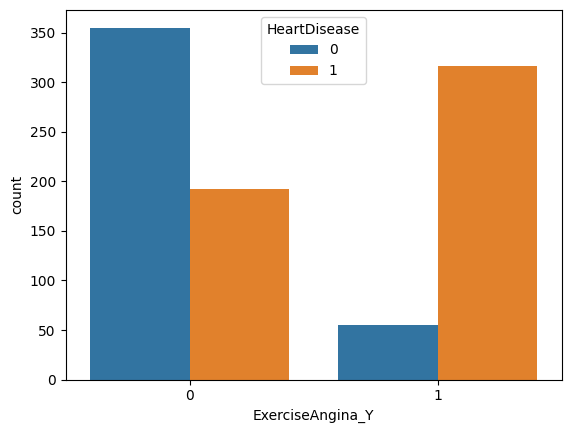

In [ ]:
sns.countplot(x='ExerciseAngina_Y', data= df, hue= 'HeartDisease')

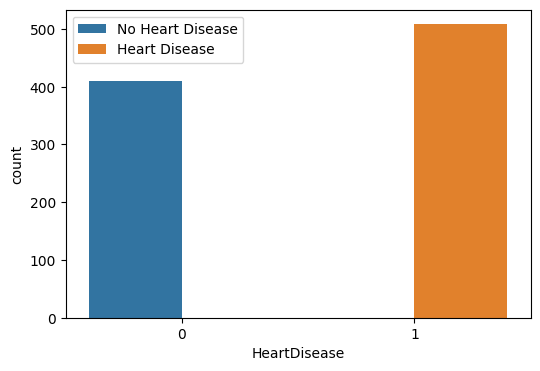

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=data, hue='HeartDisease')
plt.legend(labels= ["No Heart Disease", "Heart Disease"])
plt.show()

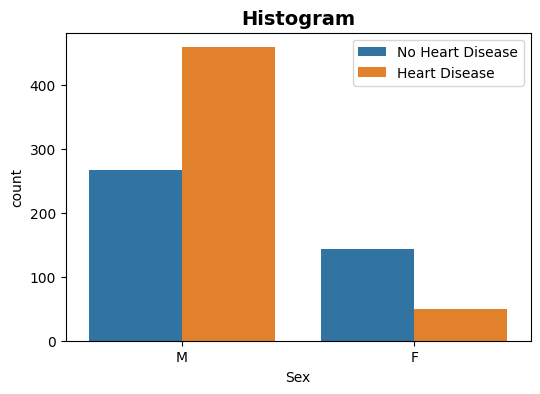

HeartDisease     0     1
Sex                     
F             74.1  25.9
M             36.8  63.2


In [ ]:
plt.figure(figsize=(6, 4))
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color='#000' )
sns.countplot(x='Sex', data=data, hue = 'HeartDisease')
plt.legend(labels= ["No Heart Disease", "Heart Disease"])
plt.show()

#Analyze the percentage
d= pd.crosstab(data['Sex'], data['HeartDisease']).apply(lambda r: round((r/r.sum())*100,1), axis=1)
print(d)

Text(0, 0.5, 'Percentage')

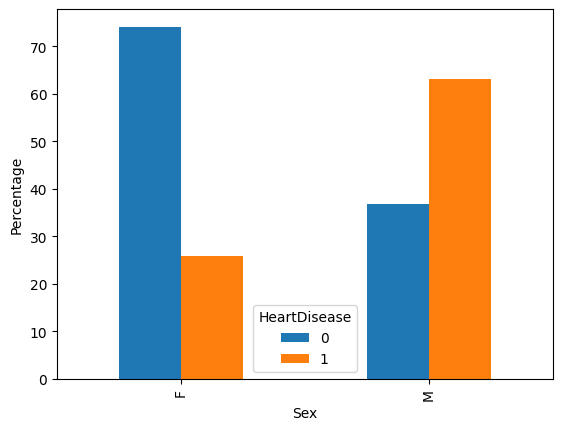

In [ ]:
d.plot(kind='bar')
plt.ylabel('Percentage')

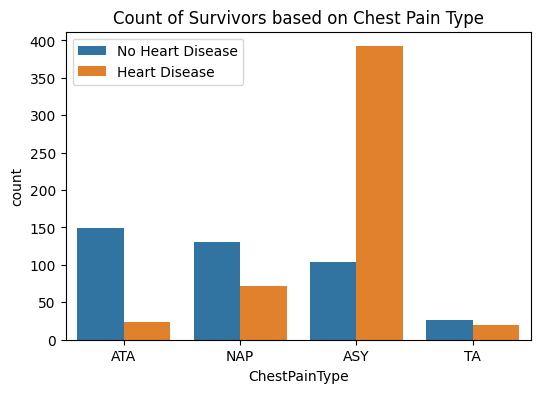

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=data)
plt.legend(labels= ["No Heart Disease", "Heart Disease"])
plt.title("Count of Survivors based on Chest Pain Type")
plt.show()

<Axes: xlabel='Cholesterol', ylabel='Count'>

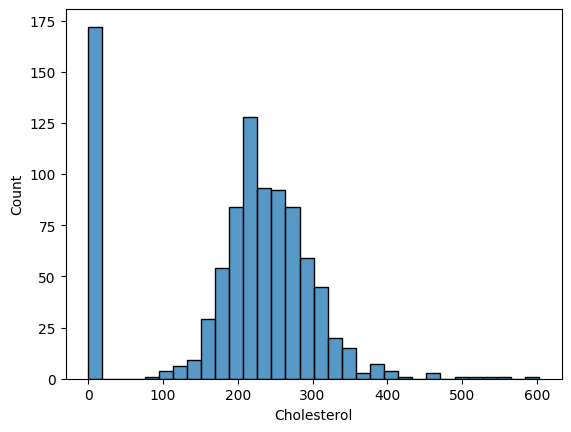

In [ ]:
sns.histplot(data, x= data['Cholesterol'])

<Axes: xlabel='ST_Slope'>

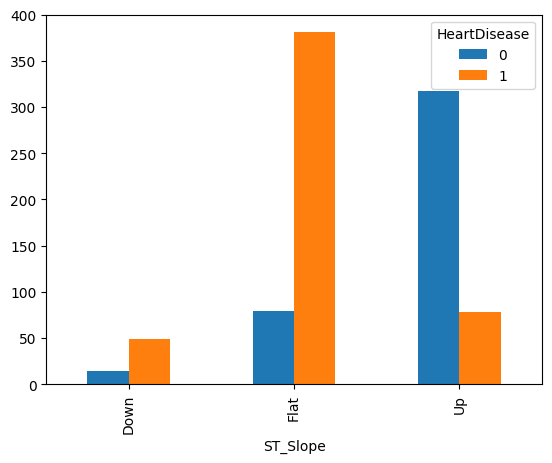

In [ ]:
#check relationship for
crs =pd.crosstab(data['ST_Slope'], data['HeartDisease'])
crs.plot(kind='bar')

# Training the Naive Bayes classfiier

In [ ]:
#Pandas profiling
!pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file ='out.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 1000x800 with 0 Axes>

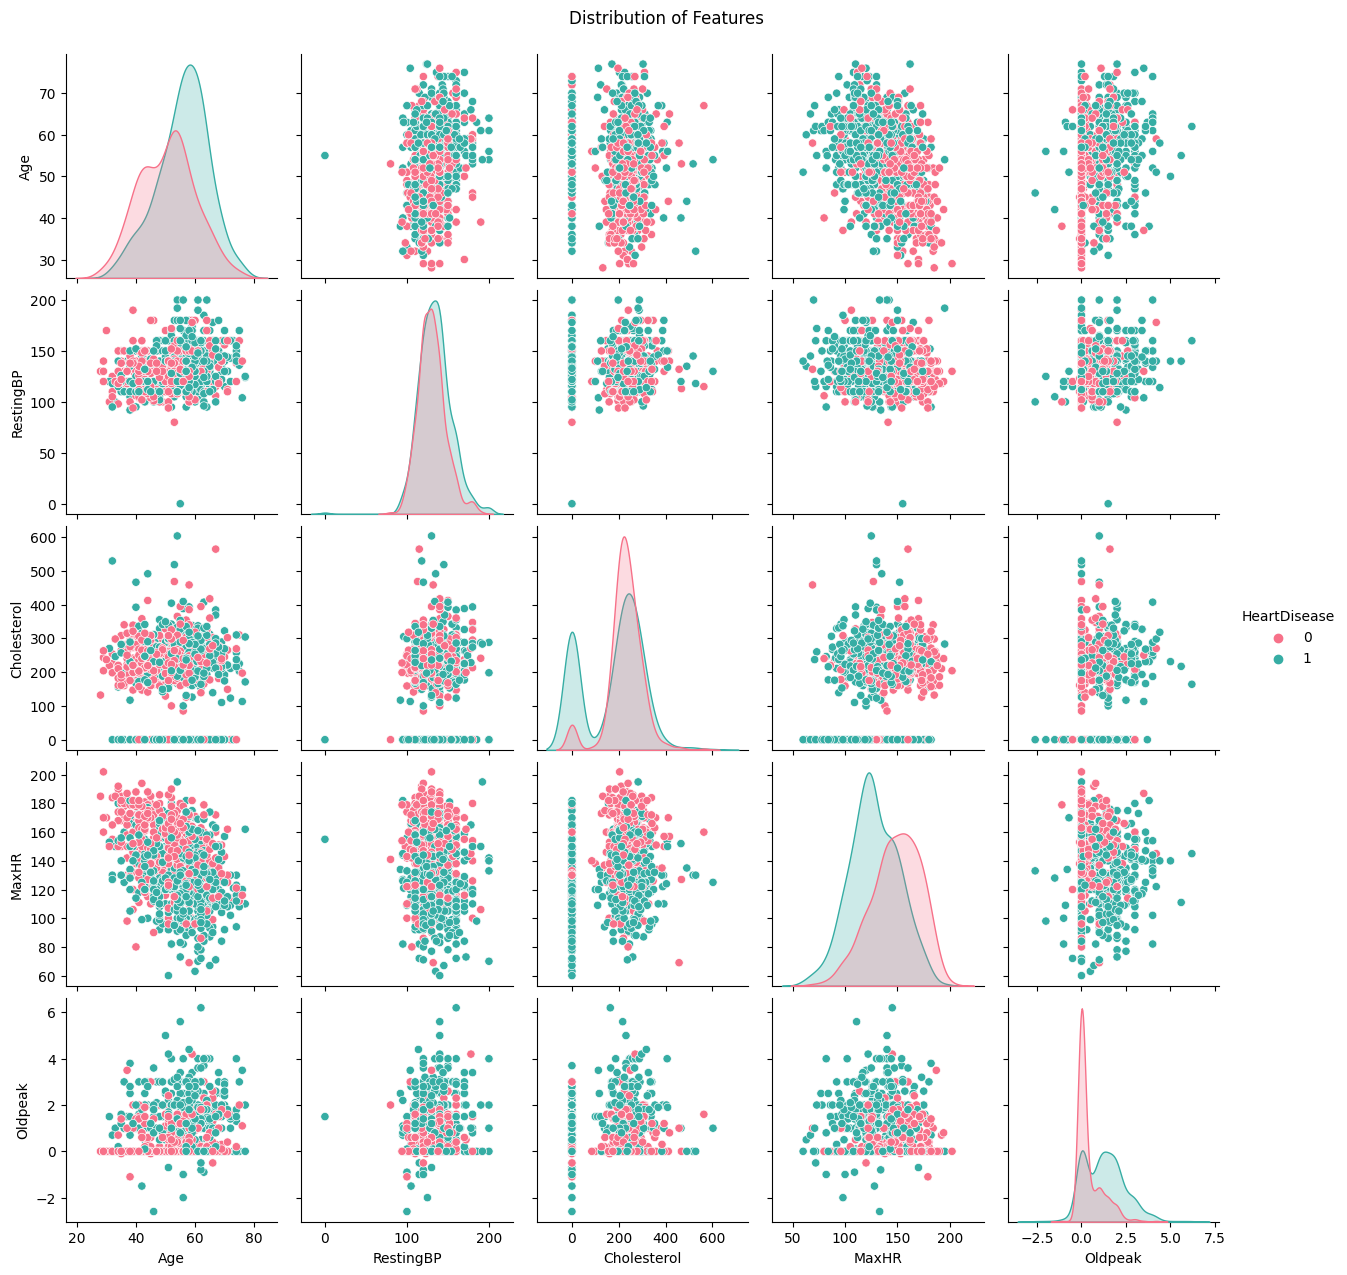

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the specified columns

# Selecting the features for the pair plot
selected_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Add 'HeartDisease' column to the DataFrame data if it's available
if 'HeartDisease' in data.columns:
    selected_features.append('HeartDisease')

plt.figure(figsize=(10, 8))
sns.pairplot(data[selected_features], hue='HeartDisease', palette='husl')
plt.suptitle("Distribution of Features", y=1.02)
plt.show()


In [ ]:
X = pd.get_dummies(data)
y = X["HeartDisease"]
X= X.drop('HeartDisease', axis=1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
def eval(gnb_model):
  conf_matrix = confusion_matrix(y_test, gnb_model.predict(X_test))
  labels= ['No Disease', 'Disease']
  plt.figure(figsize=(6,4))
  sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels= labels, yticklabels=labels)
  plt.title("Confusion Matrix"),
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()
  classification_rpt = classification_report(y_test, gnb_model.predict(X_test))
  print("\nClassification Report:")
  print(classification_rpt)

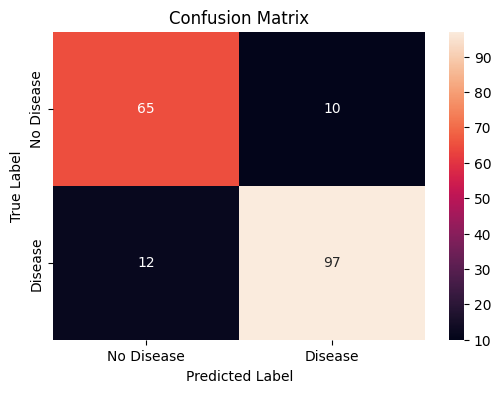


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.91      0.89      0.90       109

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
 eval(gnb_model)

Index(['RestingBP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Down'],
      dtype='object')


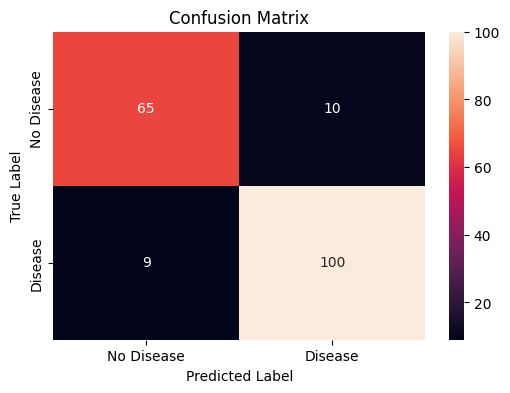


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        75
           1       0.91      0.92      0.91       109

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



In [ ]:
#lets try dropp columns with low corrn
idx = np.where(abs(corr_v.values)<0.2)
drop_col_names = col[idx]
print(drop_col_names)
new_X = X.drop(drop_col_names, axis=1)

#train

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=40)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

#eval

eval(gnb_model)

(array([ 2,  4,  7, 10, 11, 12, 14, 16, 20]),)


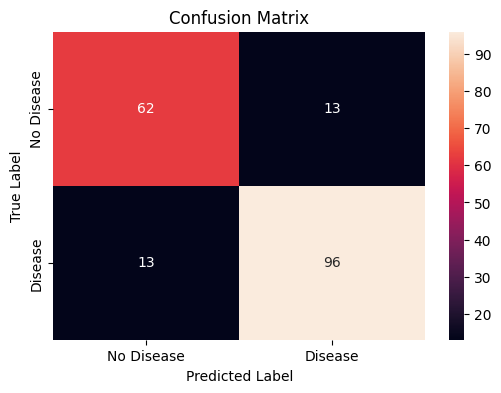


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        75
           1       0.88      0.88      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



In [ ]:
# Lets try dropping all the colums with negative corr
idx = np.where((corr_v.values)<0)
print(idx)
#I will drop these later
drop_neg = col[idx]

#Dropping
new_X = X.drop(drop_neg, axis=1)

#train

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=40)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

#eval

eval(gnb_model)

## Standardizing the Data and testing

In [ ]:
#standardizing the data
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

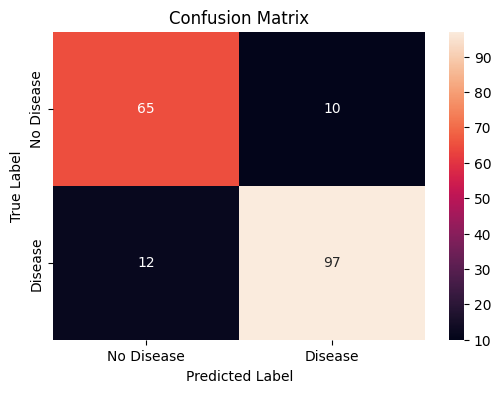


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.91      0.89      0.90       109

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [ ]:

#train
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=40)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

#eval

eval(gnb_model)

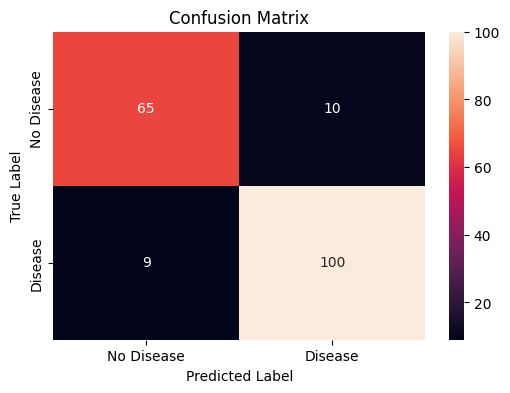


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        75
           1       0.91      0.92      0.91       109

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



In [ ]:
#lets try dropping the columns we got before
drop_col_names
new_X = X.drop(drop_col_names, axis=1)
new_X = scaler.fit_transform(new_X)
#train

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=40)
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

#eval

eval(gnb_model)